To begin the process of using our data. It is important to first import the proper libraries (pandas, numpy, and matplotlib.pyplot) for use in future code. I also read all of the excel datasets that I created into deepnote using pd.read_excel.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

points = pd.read_excel("Fantasy Points per week.xlsm", header=0, index_col=0)
matchups = pd.read_excel("Fantasy Matchups.xlsm",header=0,index_col=0)
real_wins = pd.read_excel("Fantasy Win Totals.xlsx",header=0,index_col=0)

I called the points dataframe to see the dataframe and labels.

In [3]:
points

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12
Team,,,,,,,,,,,,
Soham,122.40,88.56,101.08,128.22,119.10,119.14,104.04,122.22,87.10,109.96,106.34,161.06
Deven,84.90,99.68,66.68,79.54,75.62,67.28,46.42,36.36,112.60,84.30,89.04,63.44
John,81.58,155.70,118.94,99.82,50.62,58.38,57.18,72.76,111.30,81.06,94.76,96.28
Suneil,101.24,120.50,108.18,110.48,67.84,95.94,93.26,59.54,92.20,62.54,61.60,113.38
Spencer,82.04,109.48,121.10,94.44,100.70,68.10,103.90,99.54,74.48,112.88,106.62,61.28
Brad,96.48,98.32,125.50,79.10,89.28,67.72,122.62,97.24,64.20,56.42,105.56,74.60
Jimmy,97.36,93.34,59.46,75.60,92.68,110.58,115.66,54.22,80.38,56.42,100.40,96.10
Matt,98.30,96.80,96.52,146.28,98.48,75.50,104.72,142.94,108.24,53.28,103.84,118.94
Jackson,123.92,109.00,101.26,93.10,110.16,132.20,92.36,81.56,92.34,96.32,82.46,98.02


I made a boxplot showing the distributions of the weekly scores for each owner in the league. This made it easier to determine the median, maximum, and minimum along with the spread of the values of all the scores for each player.

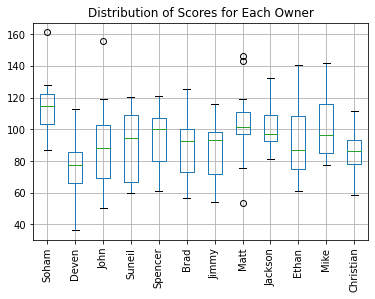

In [4]:
points.T.boxplot(column=None, by=None)
plt.title("Distribution of Scores for Each Owner")
plt.xticks(rotation=90)
plt.show()

I called the matchups dataframe to show the matchups week by week in the league. This was useful for the for loop in future code where I had to find a way to predict the scores of each matchup.

In [5]:
matchups

,H Week 1,A Week 1,H Week 2,A Week 2,H Week 3,A Week 3,H Week 4,A Week 4,H Week 5,A Week 5,...,H Week 8,A Week 8,H Week 9,A Week 9,H Week 10,A Week 10,H Week 11,A Week 11,H Week 12,A Week 12
Games,,,,,,,,,,,,,,,,,,,,,
Game 1,Deven,Jackson,John,Deven,Deven,Suneil,Soham,Deven,Deven,Mike,...,Spencer,John,Suneil,Spencer,Spencer,Soham,Mike,Spencer,Deven,Spencer
Game 2,John,Mike,Jackson,Suneil,Soham,John,Suneil,Mike,Jackson,Soham,...,Matt,Suneil,Soham,Matt,Matt,Mike,Deven,Matt,Jackson,Matt
Game 3,Suneil,Soham,Mike,Soham,Mike,Jackson,John,Jackson,John,Suneil,...,Jimmy,Soham,Mike,Jimmy,Jimmy,Deven,Jackson,Jimmy,John,Jimmy
Game 4,Spencer,Matt,Jimmy,Spencer,Spencer,Ethan,Christian,Spencer,Spencer,Brad,...,Ethan,Mike,Deven,Ethan,Ethan,Jackson,John,Ethan,Suneil,Ethan
Game 5,Jimmy,Brad,Matt,Ethan,Christian,Jimmy,Ethan,Brad,Matt,Christian,...,Christian,Deven,Jackson,Christian,Christian,John,Suneil,Christian,Soham,Christian
Game 6,Ethan,Christian,Brad,Christian,Brad,Matt,Jimmy,Matt,Jimmy,Ethan,...,Brad,Jackson,John,Brad,Brad,Suneil,Soham,Brad,Mike,Brad


I found the mean and standard deviation for each owner's scores and concatenated them into a new dataframe which can be seen below to show the spreads of means and standard deviation of all of the owners.

In [6]:
std = points.std(axis=1)
mean = points.mean(axis=1)
summarypoints = pd.concat([mean.rename('Mean'),std.rename('Standard Deviation')], axis=1)
summarypoints

,Mean,Standard Deviation
Team,,
Soham,114.101667,19.815547
Deven,75.488333,21.309278
John,89.865000,29.911707
Suneil,90.558333,22.114689
Spencer,94.546667,18.890687
Brad,89.753333,22.106090
Jimmy,86.016667,20.779945
Matt,103.653333,25.405304
Jackson,101.058333,15.407147


I used this code below to just get a list of players to be iterated through in the for loop.

In [7]:
players_list = list(points.index.values)
players_list

['Soham',
 'Deven',
 'John',
 'Suneil',
 'Spencer',
 'Brad',
 'Jimmy',
 'Matt',
 'Jackson',
 'Ethan',
 'Mike',
 'Christian']

This for loop represents the bulk of my code. I started by making a blank dataframe which will collect the wins for each player for each simulation. The first part iterates over the list of players, creates two blank lists of wins and losses, adds the win totals for each simulation to that players column in the dataframe and plots those wins for each player. 

The next level of the loop iterates over the 100 simulations, creates two blank lists to put all of the winners and losers, sets a seed, and then appends the count of wins and losses for the player to the list of wins and losses.

The next level of the loop iterates over the range 1 to 13, with the values correlating to the weekly matchups in the matchups dataframe.

The penultimate level of the loop iterates over the range 0 to 6, with the values correlating to each game during the week in the matchups dataframe. It also sets the away team and home team using the iterated values, finds the mean and standard deviation for both, and generates normal random numbers using the mean and standard deviations representing the home and away fantasy team scores.

The last level of the loop is an if statement, adding the winners to the winners list and the losers to the losers list depending on which team one. 

The plot that I used for each  owner was a line plot that showed the number of wins  in each simulation. It created a plot for each player, and kept the scale the same for each for easy interpretation. 

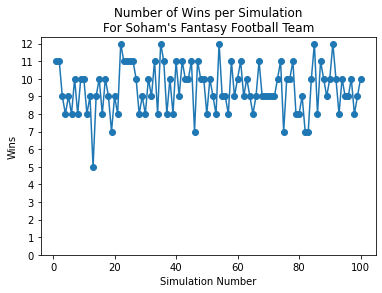

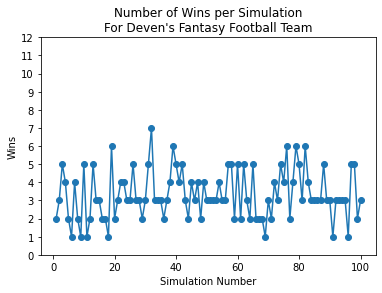

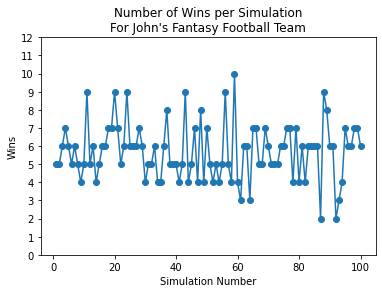

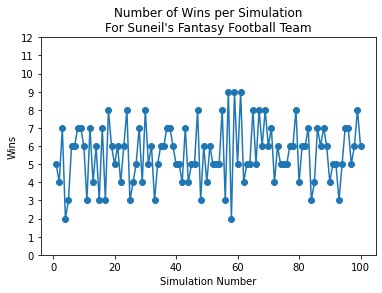

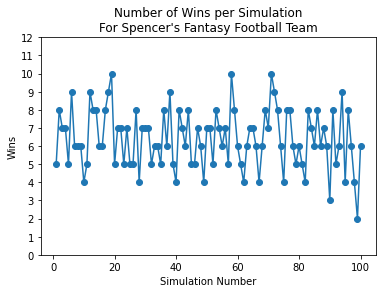

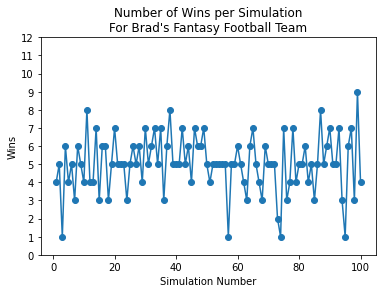

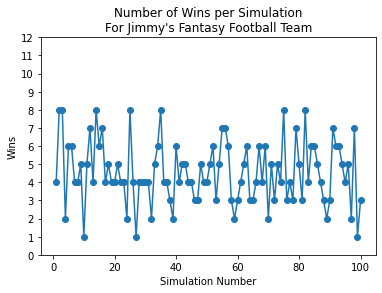

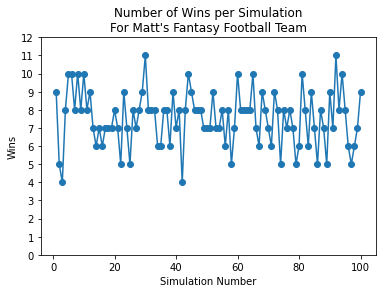

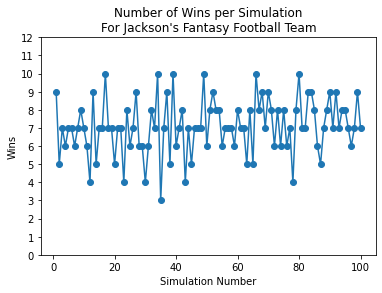

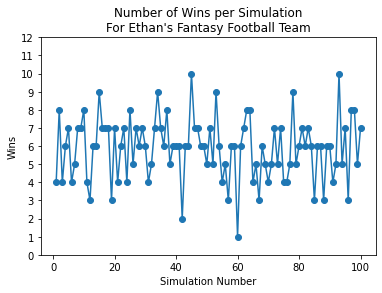

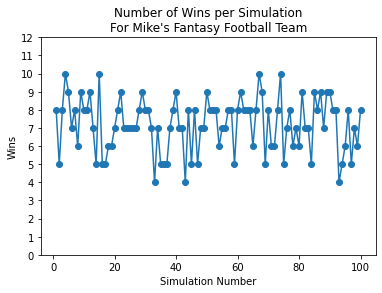

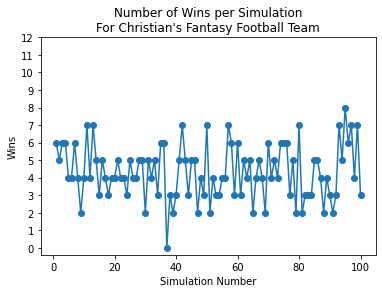

In [8]:
player_wins_df = pd.DataFrame()
for player in players_list:
    my_wins = []
    my_losses = []
    for sim in range (100):
        winners = []
        losers = []
        np.random.seed(sim + 5)
        for i in range(1,13):
            for j in range(0,6):       
                away_team = matchups.iloc[j,2*i-2]
                home_team = matchups.iloc[j,2*i-1]
                mean_away = mean.loc[away_team]
                std_away = std.loc[away_team]
                mean_home = mean.loc[home_team]
                std_home = std.loc[home_team]
                away_points = np.random.normal(mean_away,std_away,size=1)
                home_points = np.random.normal(mean_home,std_home,size=1)
                if home_points > away_points:
                    winners.append(home_team)
                    losers.append(away_team)
                else:
                    winners.append(away_team)
                    losers.append(home_team)
        my_wins.append(winners.count(player))
        my_losses.append(losers.count(player))
    player_wins_df[player]=my_wins
    plt.plot(range(1,101),my_wins,'-o')
    plt.title('Number of Wins per Simulation\nFor ' + player + '\'s Fantasy Football Team')
    plt.xlabel('Simulation Number')
    plt.ylabel('Wins')
    plt.yticks(np.arange(0,13,step = 1))
    plt.show()

I used the new dataframe to create a boxplot of all of our win totals from each season.

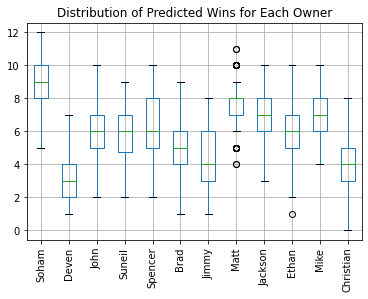

In [9]:
player_wins_df.boxplot()
plt.title("Distribution of Predicted Wins for Each Owner")
plt.xticks(rotation=90)
plt.show()

I wanted to calculate what percentile the real life win total was in the random sample for each player. I did this by forming a for loop that iterated through the players and found which simulations had a win total that was less than or equal to the real win total for the team. I then counted the results and added them to a new dictionary. I also calculated the z-scores for each players real score and added it to a separate dictionary.

In [10]:
percentiles = {}
z_scores = {}
for player in players_list:
    rw = real_wins.loc[player,"Wins"]
    wins_rw = player_wins_df.loc[:,player]
    rw_percentile = wins_rw[wins_rw<=rw].count()
    z = (rw-wins_rw.mean())/wins_rw.std()
    z_scores[player] = z
    percentiles[player] = rw_percentile/100

In [11]:
percentiles

{'Soham': 0.06,
 'Deven': 0.63,
 'John': 0.74,
 'Suneil': 0.72,
 'Spencer': 0.97,
 'Brad': 0.3,
 'Jimmy': 0.72,
 'Matt': 0.77,
 'Jackson': 0.06,
 'Ethan': 0.38,
 'Mike': 1.0,
 'Christian': 0.77}

In [12]:
z_scores

{'Soham': -1.792928001444362,
 'Deven': -0.2446598043294675,
 'John': 0.19935461264169327,
 'Suneil': 0.2650781026830635,
 'Spencer': 1.6043690348545119,
 'Brad': -0.6522070399216283,
 'Jimmy': 0.26746085579756146,
 'Matt': 0.3025585703892614,
 'Jackson': -2.0352969066945614,
 'Ethan': -0.5007199309529504,
 'Mike': 1.8956089610817246,
 'Christian': 0.4320197313260217}

In [14]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : db08276bc116c438d3fdee492026f8223584c477
python           : 3.8.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.18362
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.1.3
numpy            : 1.19.2
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.2.4
setuptools       : 50.3.1.post20201107
Cython           : 0.29.21
pytest           : 6.1.1
hypothesis       : None
sphinx           : 3.2.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.7
lxml.etree       : 4.6.1
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.19.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck  